In [ ]:
# Clone the repository
!git clone https://github.com/hiive/mlrose.git
%cd mlrose

# Fetch all pull requests
!git fetch origin pull/22/head:fix-joblib-issue

# Checkout the specific pull request
!git checkout fix-joblib-issue

# Install the package from the local clone with the applied fix
!pip install .

# Return to the original directory if needed
%cd ..

Cloning into 'mlrose'...
remote: Enumerating objects: 2606, done.
remote: Counting objects: 100% (396/396), done.
remote: Compressing objects: 100% (167/167), done.
remote: Total 2606 (delta 251), reused 343 (delta 229), pack-reused 2210
Receiving objects: 100% (2606/2606), 1.97 MiB | 13.17 MiB/s, done.
Resolving deltas: 100% (1827/1827), done.
/content/mlrose
From https://github.com/hiive/mlrose
 * [new ref]         refs/pull/22/head -> fix-joblib-issue
Switched to branch 'fix-joblib-issue'
Processing /content/mlrose
  Preparing metadata (setup.py) ... done
  Created wheel for mlrose-hiive: filename=mlrose_hiive-2.2.4-py3-none-any.whl size=102985 sha256=9a1a45d487c1491aab158cc8b2248f246f3ba5e58e570c851c5cb2cb6c621572
  Stored in directory: /tmp/pip-ephem-wheel-cache-zxba37lo/wheels/50/ac/56/a248001dcf63344fbef992039dec2613cb4a7c56222c6f9a92
Successfully built mlrose-hiive
/content


In [ ]:
!pip install python-chess

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 1.9 MB/s eta 0:00:00


In [ ]:
from IPython.core.display import display, HTML # for some notebook formatting.

import mlrose_hiive
import numpy as np
import pandas as pd
import logging
import networkx as nx
import matplotlib.pyplot as plt
import string


from ast import literal_eval
#import chess

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from mlrose_hiive import QueensGenerator, MaxKColorGenerator, TSPGenerator
from mlrose_hiive import random_hill_climb, simulated_annealing, genetic_alg, mimic, FourPeaks, TravellingSales, Queens
from mlrose_hiive import ExpDecay, GeomDecay, ArithDecay, DiscreteOpt, SARunner, GARunner, RHCRunner, MIMICRunner, NNGSRunner
#from mlrose_hiive.fitness import FourPeaks, QueensGenerator
import time
import random

# switch off the chatter
logging.basicConfig(level=logging.WARNING)

# Analysis of the Eight Queens Optimization problem and the algorithms

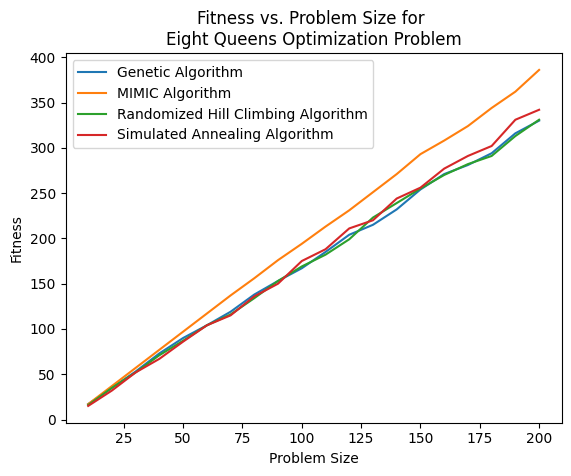

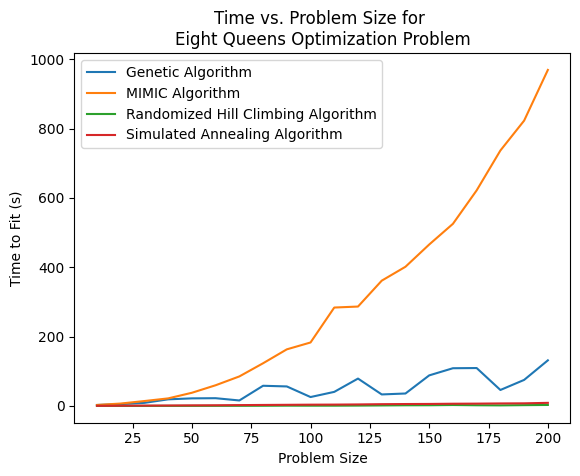

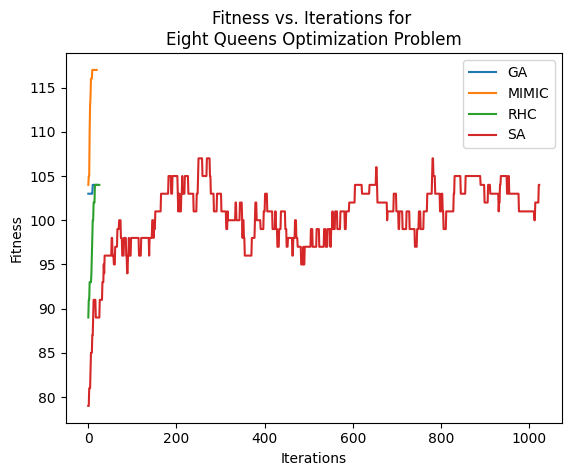

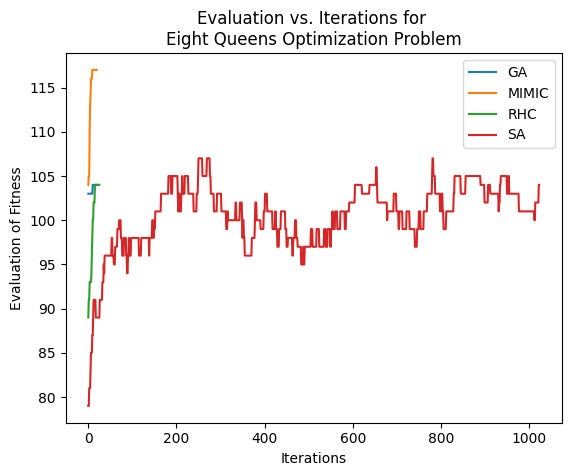

             Time
GA     131.479000
MIMIC  968.935413
RHC      2.816999
SA       8.895845


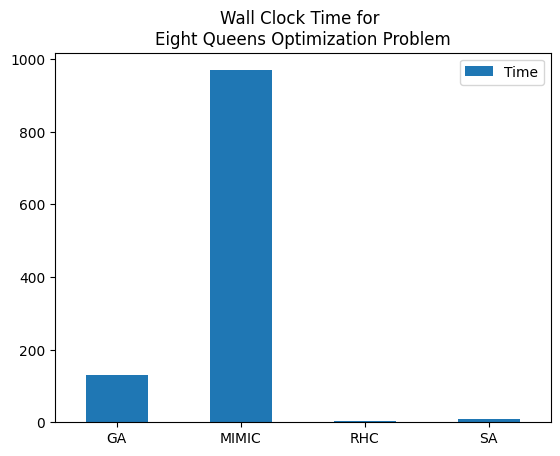

In [ ]:
# Initialize lists to store fitness and time values
fitness = {'ga': [], 'mimic': [], 'rhc': [], 'sa': []}
times = {'ga': [], 'mimic': [], 'rhc': [], 'sa': []}

problem_size = range(10, 210, 10)

# Loop through each problem size
for size in problem_size:
    fitness_obj = Queens()
    problem = DiscreteOpt(length=size, fitness_fn=fitness_obj, maximize=True)

    algorithms = {
        'ga': lambda: genetic_alg(problem=problem, pop_size=800, mutation_prob=0.15, max_iters=1024, random_state=2, curve=True),
        'mimic': lambda: mimic(problem=problem, pop_size=800, keep_pct=0.3, random_state=2, max_iters=1024, curve=True),  # Removed the 'fast_mode' argument
        'rhc': lambda: random_hill_climb(problem=problem, max_iters=1024, random_state=2, restarts=8, curve=True),
        'sa': lambda: simulated_annealing(problem=problem, schedule=ArithDecay(), random_state=2, max_attempts=100, max_iters=1024, curve=True)
    }

    for algo_name, algo_func in algorithms.items():
        start_time = time.time()
        _, best_fitness, _ = algo_func()
        end_time = time.time()

        fitness[algo_name].append(best_fitness)
        times[algo_name].append(end_time - start_time)

# Convert fitness and time lists to numpy arrays for plotting
for key in fitness:
    fitness[key] = np.array(fitness[key])
    times[key] = np.array(times[key])

import pandas as pd
import matplotlib.pyplot as plt
# Plot Fitness vs. Problem Size
plt.figure()
for key, label in zip(fitness, ['Genetic Algorithm', 'MIMIC Algorithm', 'Randomized Hill Climbing Algorithm', 'Simulated Annealing Algorithm']):
    plt.plot(problem_size, fitness[key], label=label)
plt.title('Fitness vs. Problem Size for \nEight Queens Optimization Problem')
plt.xlabel('Problem Size')
plt.ylabel('Fitness')
plt.legend()
plt.show()

# Plot Time vs. Problem Size
plt.figure()
for key, label in zip(times, ['Genetic Algorithm', 'MIMIC Algorithm', 'Randomized Hill Climbing Algorithm', 'Simulated Annealing Algorithm']):
    plt.plot(problem_size, times[key], label=label)
plt.title('Time vs. Problem Size for \nEight Queens Optimization Problem')
plt.xlabel('Problem Size')
plt.ylabel('Time to Fit (s)')
plt.legend()
plt.show()

# Plot Fitness vs. Iterations for a fixed problem length
problem_length = 60
fitness_obj = Queens()
problem = DiscreteOpt(length=problem_length, fitness_fn=fitness_obj, maximize=True)
curves = {}

plt.figure()
for algo_name, algo_func in algorithms.items():
    start_time = time.time()
    _, _, curve = algo_func()
    curves[algo_name] = curve[:, 0]
    plt.plot(curve[:, 0], label=algo_name.upper())
plt.title('Fitness vs. Iterations for \nEight Queens Optimization Problem')
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.legend()
plt.show()

# Plot Evaluation vs. Iterations
plt.figure()
for key in curves:
    plt.plot(curves[key], label=key.upper())
plt.title('Evaluation vs. Iterations for \nEight Queens Optimization Problem')
plt.xlabel('Iterations')
plt.ylabel('Evaluation of Fitness')
plt.legend()
plt.show()

# Summary of times for each algorithm
time_summary = [times[key][-1] for key in times]
algorithms = ['GA', 'MIMIC', 'RHC', 'SA']
df = pd.DataFrame(time_summary, index=algorithms, columns=['Time'])
print(df)

ax = df.plot.bar(rot=0, title='Wall Clock Time for \nEight Queens Optimization Problem')
plt.show()

# Analysis of the Four Peaks Optimization problem and the algorithms

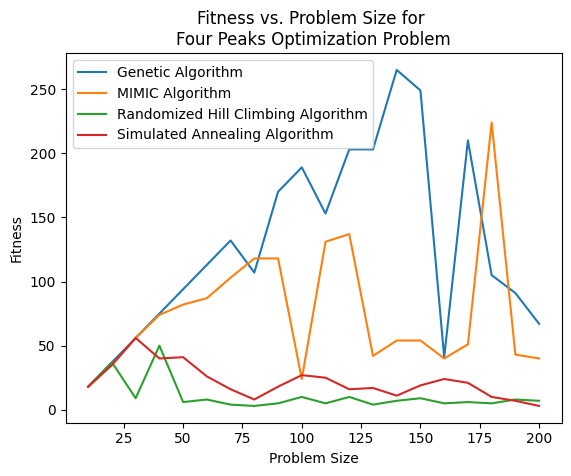

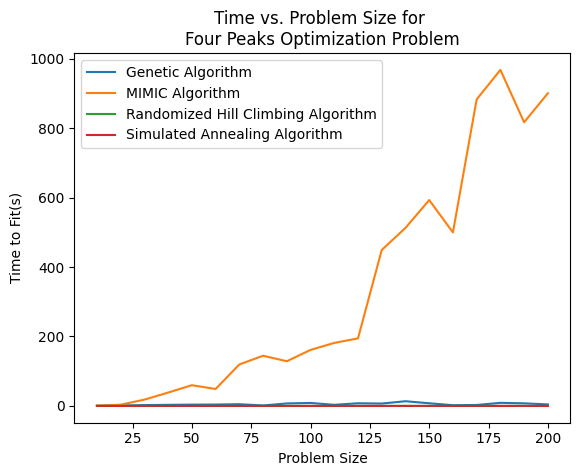

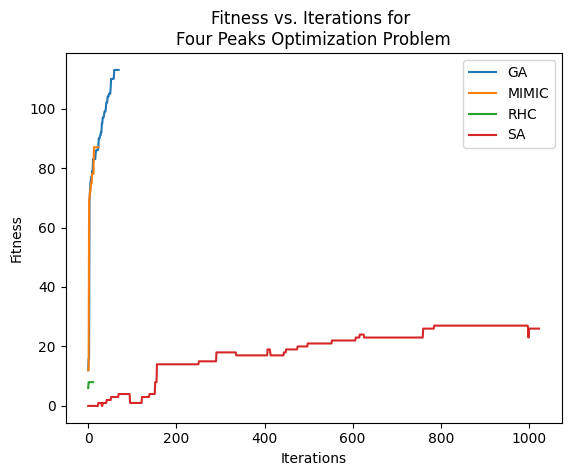

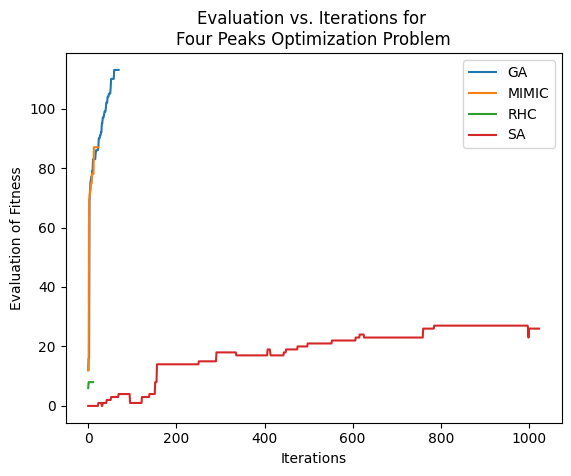

             Time
GA       4.343735
MIMIC  900.706029
RHC      0.009546
SA       0.022829


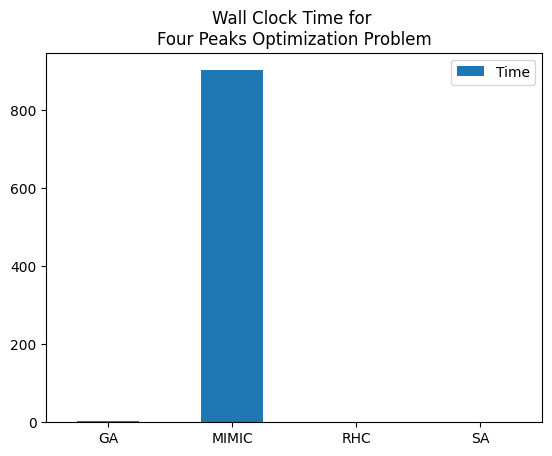

In [ ]:
# Initialize lists to store fitness and time values
fitness = {'ga': [], 'mimic': [], 'rhc': [], 'sa': []}
times = {'ga': [], 'mimic': [], 'rhc': [], 'sa': []}

problem_size = range(10, 210, 10)

# Loop through each problem size
for size in problem_size:
    fitness_obj = FourPeaks()
    problem = DiscreteOpt(length=size, fitness_fn=fitness_obj, maximize=True)

    algorithms = {
        'ga': lambda: genetic_alg(problem=problem, pop_size=800, mutation_prob=0.15, max_iters=1024, random_state=2, curve=True),
        'mimic': lambda: mimic(problem=problem, pop_size=800, keep_pct=0.3, random_state=2, max_iters=1024, curve=True),  # Removed the 'fast_mode' argument
        'rhc': lambda: random_hill_climb(problem=problem, max_iters=1024, random_state=2, restarts=8, curve=True),
        'sa': lambda: simulated_annealing(problem=problem, schedule=ArithDecay(), random_state=2, max_attempts=100, max_iters=1024, curve=True)
    }

    for algo_name, algo_func in algorithms.items():
        start_time = time.time()
        _, best_fitness, _ = algo_func()
        end_time = time.time()

        fitness[algo_name].append(best_fitness)
        times[algo_name].append(end_time - start_time)

# Convert fitness and time lists to numpy arrays for plotting
for key in fitness:
    fitness[key] = np.array(fitness[key])
    times[key] = np.array(times[key])

# Plot Fitness vs. Problem Size
plt.figure()
for key, label in zip(fitness, ['Genetic Algorithm', 'MIMIC Algorithm', 'Randomized Hill Climbing Algorithm', 'Simulated Annealing Algorithm']):
    plt.plot(problem_size, fitness[key], label=label)
plt.title('Fitness vs. Problem Size for \nFour Peaks Optimization Problem')
plt.xlabel('Problem Size')
plt.ylabel('Fitness')
plt.legend()
plt.show()

# Plot Time vs. Problem Size
plt.figure()
for key, label in zip(times, ['Genetic Algorithm', 'MIMIC Algorithm', 'Randomized Hill Climbing Algorithm', 'Simulated Annealing Algorithm']):
    plt.plot(problem_size, times[key], label=label)
plt.title('Time vs. Problem Size for \nFour Peaks Optimization Problem')
plt.xlabel('Problem Size')
plt.ylabel('Time to Fit(s)')
plt.legend()
plt.show()

# Plot Fitness vs. Iterations for a fixed problem length
problem_length = 60
fitness_obj = FourPeaks()
problem = DiscreteOpt(length=problem_length, fitness_fn=fitness_obj, maximize=True)
curves = {}

plt.figure()
for algo_name, algo_func in algorithms.items():
    start_time = time.time()
    _, _, curve = algo_func()
    curves[algo_name] = curve[:, 0]
    plt.plot(curve[:, 0], label=algo_name.upper())
plt.title('Fitness vs. Iterations for \nFour Peaks Optimization Problem')
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.legend()
plt.show()

# Plot Evaluation vs. Iterations
plt.figure()
for key in curves:
    plt.plot(curves[key], label=key.upper())
plt.title('Evaluation vs. Iterations for \nFour Peaks Optimization Problem')
plt.xlabel('Iterations')
plt.ylabel('Evaluation of Fitness')
plt.legend()
plt.show()

# Summary of times for each algorithm
time_summary = [times[key][-1] for key in times]
algorithms = ['GA', 'MIMIC', 'RHC', 'SA']
df = pd.DataFrame(time_summary, index=algorithms, columns=['Time'])
print(df)

ax = df.plot.bar(rot=0, title='Wall Clock Time for \nFour Peaks Optimization Problem')
plt.show()